In [1]:
!pip install mpld3
import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np
import mpld3
import plotly.express as px
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression

In [2]:
# 'events-US-1980-2024_CostEstimate.csv' 1 billion or more CPI-adjusted cost (x-millions).

df = pd.read_csv('events-US-1980-2024_CostEstimate.csv', sep=",", header=2)

In [3]:
#read the datframe
df

Name          Disaster  \
0     Southern Severe Storms and Flooding (April 1980)          Flooding   
1                        Hurricane Allen (August 1980)  Tropical Cyclone   
2    Central/Eastern Drought/Heat Wave (Summer-Fall...           Drought   
3                        Florida Freeze (January 1981)            Freeze   
4    Severe Storms, Flash Floods, Hail, Tornadoes (...      Severe Storm   
..                                                 ...               ...   
398                      Hurricane Debby (August 2024)  Tropical Cyclone   
399                Hurricane Francine (September 2024)  Tropical Cyclone   
400                  Hurricane Helene (September 2024)  Tropical Cyclone   
401                    Hurricane Milton (October 2024)  Tropical Cyclone   
402  Southern/Eastern/Northwestern Drought and Heat...           Drought   

     Begin Date  End Date  CPI-Adjusted Cost  Unadjusted Cost  Deaths  
0      19800410  19800417             2749.4            706.8       7  
1      19800807  19800811             2236.2            590.0      13  
2      19800601  19801130            40681.2          10020.0    1260  
3      19810112  19810114             2076.4            572.0       0  
4      19810505  19810510             1409.1            401.4      20  
..          ...       ...                ...              ...     ...  
398    20240805  20240809             2476.0           2476.0      17  
399    20240911  20240912             1291.0           1291.0       0  
400    20240924  20240929            78721.0          78721.0     219  
401    20241009  20241010            34250.0          34250.0      32  
402    20240101  20241231             5417.0           5311.0     136  

[403 rows x 7 columns]

In [4]:
#list the columns name
columns =df.columns
print(columns)

Index(['Name', 'Disaster', 'Begin Date', 'End Date', 'CPI-Adjusted Cost',
       'Unadjusted Cost', 'Deaths'],
      dtype='object')


In [5]:
#list the columns type
dtypes = df.dtypes
print(dtypes)

Name                  object
Disaster              object
Begin Date             int64
End Date               int64
CPI-Adjusted Cost    float64
Unadjusted Cost      float64
Deaths                 int64
dtype: object


In [6]:
# change the dates to datetime format
df['begin_date'] = pd.to_datetime(df['Begin Date'], format='%Y%m%d')
df['end_date'] = pd.to_datetime(df['End Date'], format='%Y%m%d')

df

Name          Disaster  \
0     Southern Severe Storms and Flooding (April 1980)          Flooding   
1                        Hurricane Allen (August 1980)  Tropical Cyclone   
2    Central/Eastern Drought/Heat Wave (Summer-Fall...           Drought   
3                        Florida Freeze (January 1981)            Freeze   
4    Severe Storms, Flash Floods, Hail, Tornadoes (...      Severe Storm   
..                                                 ...               ...   
398                      Hurricane Debby (August 2024)  Tropical Cyclone   
399                Hurricane Francine (September 2024)  Tropical Cyclone   
400                  Hurricane Helene (September 2024)  Tropical Cyclone   
401                    Hurricane Milton (October 2024)  Tropical Cyclone   
402  Southern/Eastern/Northwestern Drought and Heat...           Drought   

     Begin Date  End Date  CPI-Adjusted Cost  Unadjusted Cost  Deaths  \
0      19800410  19800417             2749.4            706.8       7   
1      19800807  19800811             2236.2            590.0      13   
2      19800601  19801130            40681.2          10020.0    1260   
3      19810112  19810114             2076.4            572.0       0   
4      19810505  19810510             1409.1            401.4      20   
..          ...       ...                ...              ...     ...   
398    20240805  20240809             2476.0           2476.0      17   
399    20240911  20240912             1291.0           1291.0       0   
400    20240924  20240929            78721.0          78721.0     219   
401    20241009  20241010            34250.0          34250.0      32   
402    20240101  20241231             5417.0           5311.0     136   

    begin_date   end_date  
0   1980-04-10 1980-04-17  
1   1980-08-07 1980-08-11  
2   1980-06-01 1980-11-30  
3   1981-01-12 1981-01-14  
4   1981-05-05 1981-05-10  
..         ...        ...  
398 2024-08-05 2024-08-09  
399 2024-09-11 2024-09-12  
400 2024-09-24 2024-09-29  
401 2024-10-09 2024-10-10  
402 2024-01-01 2024-12-31  

[403 rows x 9 columns]

In [7]:
#confirm the dytpes
dtypes = df.dtypes
print(dtypes)

Name                         object
Disaster                     object
Begin Date                    int64
End Date                      int64
CPI-Adjusted Cost           float64
Unadjusted Cost             float64
Deaths                        int64
begin_date           datetime64[ns]
end_date             datetime64[ns]
dtype: object


In [8]:
#how many disaster types?
unique_values = df['Disaster'].unique()

# Print the unique values
print(unique_values)

['Flooding' 'Tropical Cyclone' 'Drought' 'Freeze' 'Severe Storm'
 'Winter Storm' 'Wildfire']


In [9]:
# Count unique values for Disaster types
unique_count = df['Disaster'].nunique()

# Print the count of unique values
print(unique_count)

7


In [10]:
# make a df for tropical cyclone only
tropical_cyclone_df = df[df['Disaster'] == 'Tropical Cyclone']

# Print the new DataFrame
print(tropical_cyclone_df)

                                    Name          Disaster  Begin Date  \
1          Hurricane Allen (August 1980)  Tropical Cyclone    19800807   
10        Hurricane Alicia (August 1983)  Tropical Cyclone    19830817   
19      Hurricane Elena (September 1985)  Tropical Cyclone    19850830   
20     Hurricane Gloria (September 1985)  Tropical Cyclone    19850926   
21         Hurricane Juan (October 1985)  Tropical Cyclone    19851027   
..                                   ...               ...         ...   
396          Hurricane Beryl (July 2024)  Tropical Cyclone    20240708   
398        Hurricane Debby (August 2024)  Tropical Cyclone    20240805   
399  Hurricane Francine (September 2024)  Tropical Cyclone    20240911   
400    Hurricane Helene (September 2024)  Tropical Cyclone    20240924   
401      Hurricane Milton (October 2024)  Tropical Cyclone    20241009   

     End Date  CPI-Adjusted Cost  Unadjusted Cost  Deaths begin_date  \
1    19800811             2236.2       

In [11]:
tropical_cyclone_df

Name          Disaster  Begin Date  \
1          Hurricane Allen (August 1980)  Tropical Cyclone    19800807   
10        Hurricane Alicia (August 1983)  Tropical Cyclone    19830817   
19      Hurricane Elena (September 1985)  Tropical Cyclone    19850830   
20     Hurricane Gloria (September 1985)  Tropical Cyclone    19850926   
21         Hurricane Juan (October 1985)  Tropical Cyclone    19851027   
..                                   ...               ...         ...   
396          Hurricane Beryl (July 2024)  Tropical Cyclone    20240708   
398        Hurricane Debby (August 2024)  Tropical Cyclone    20240805   
399  Hurricane Francine (September 2024)  Tropical Cyclone    20240911   
400    Hurricane Helene (September 2024)  Tropical Cyclone    20240924   
401      Hurricane Milton (October 2024)  Tropical Cyclone    20241009   

     End Date  CPI-Adjusted Cost  Unadjusted Cost  Deaths begin_date  \
1    19800811             2236.2            590.0      13 1980-08-07   
10   19830820             9450.0           3000.0      21 1983-08-17   
19   19850903             3788.4           1297.4       4 1985-08-30   
20   19850928             2491.3            856.1      11 1985-09-26   
21   19851031             4340.4           1496.7      63 1985-10-27   
..        ...                ...              ...     ...        ...   
396  20240708             7219.0           7219.0      46 2024-07-08   
398  20240809             2476.0           2476.0      17 2024-08-05   
399  20240912             1291.0           1291.0       0 2024-09-11   
400  20240929            78721.0          78721.0     219 2024-09-24   
401  20241010            34250.0          34250.0      32 2024-10-09   

      end_date  
1   1980-08-11  
10  1983-08-20  
19  1985-09-03  
20  1985-09-28  
21  1985-10-31  
..         ...  
396 2024-07-08  
398 2024-08-09  
399 2024-09-12  
400 2024-09-29  
401 2024-10-10  

[67 rows x 9 columns]

In [12]:
dtypes = tropical_cyclone_df.dtypes
print(dtypes)

Name                         object
Disaster                     object
Begin Date                    int64
End Date                      int64
CPI-Adjusted Cost           float64
Unadjusted Cost             float64
Deaths                        int64
begin_date           datetime64[ns]
end_date             datetime64[ns]
dtype: object


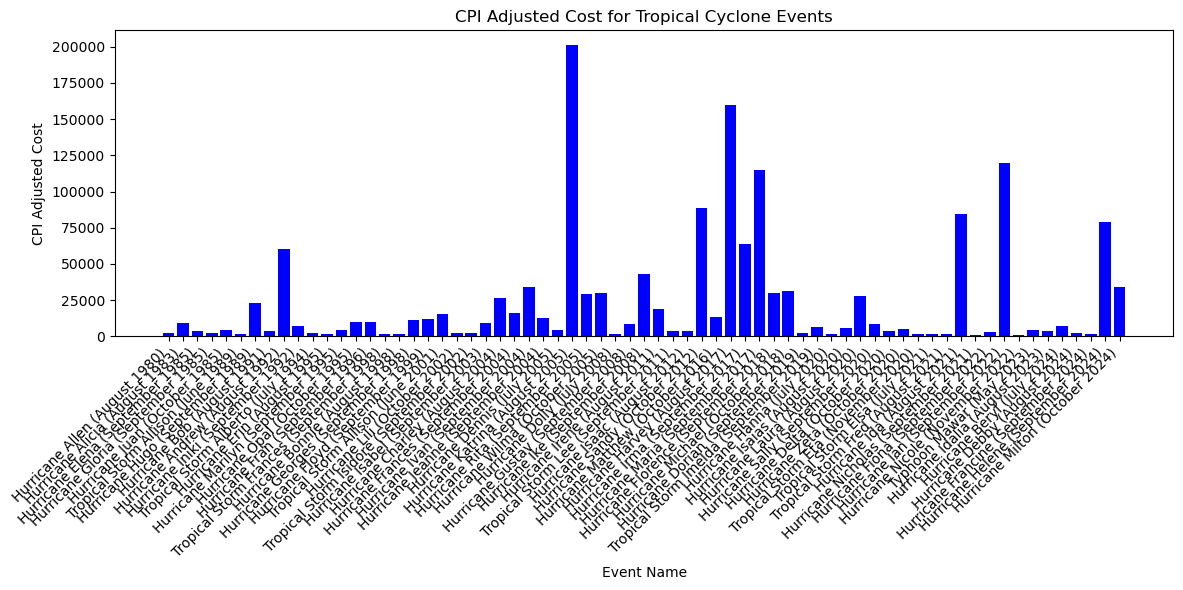

In [13]:
import matplotlib.pyplot as plt
# Bar plot
plt.figure(figsize=(12, 6))
plt.bar(tropical_cyclone_df['Name'], tropical_cyclone_df['CPI-Adjusted Cost'], color='blue')
plt.title('CPI Adjusted Cost for Tropical Cyclone Events')
plt.xlabel('Event Name')
plt.ylabel('CPI Adjusted Cost')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()

# Save the figure before showing it
plt.savefig('bar_plot.png')

# Show the plot
plt.show()


In [14]:
pd.set_option('display.max_rows', 100)  # Show at least 100 rows
pd.set_option('display.max_colwidth', None)  # Ensure full column values are displayed

top_100_values = tropical_cyclone_df['Name'].head(100)

#print all top 100 values
print(top_100_values)

1                Hurricane Allen (August 1980)
10              Hurricane Alicia (August 1983)
19            Hurricane Elena (September 1985)
20           Hurricane Gloria (September 1985)
21               Hurricane Juan (October 1985)
28          Tropical Storm Allison (June 1989)
29             Hurricane Hugo (September 1989)
38                 Hurricane Bob (August 1991)
44              Hurricane Andrew (August 1992)
45            Hurricane Iniki (September 1992)
56          Tropical Storm Alberto (July 1994)
62                Hurricane Erin (August 1995)
63          Hurricane Marilyn (September 1995)
65               Hurricane Opal (October 1995)
69             Hurricane Fran (September 1996)
79     Tropical Storm Frances (September 1998)
80              Hurricane Bonnie (August 1998)
82          Hurricane Georges (September 1998)
89            Hurricane Floyd (September 1999)
97          Tropical Storm Allison (June 2001)
99               Hurricane Lili (October 2002)
100    Tropic

In [15]:
# Remove the word "tropical" from all rows in the specified column
tropical_cyclone_df['Name'] = tropical_cyclone_df['Name'].str.replace('Tropical', '', regex=False)

/var/folders/t9/4vfph_3j64n13cp0yftr6jxw0000gn/T/ipykernel_53281/811588990.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tropical_cyclone_df['Name'] = tropical_cyclone_df['Name'].str.replace('Tropical', '', regex=False)


In [16]:
tropical_cyclone_df.head(50)

Name          Disaster  Begin Date  \
1          Hurricane Allen (August 1980)  Tropical Cyclone    19800807   
10        Hurricane Alicia (August 1983)  Tropical Cyclone    19830817   
19      Hurricane Elena (September 1985)  Tropical Cyclone    19850830   
20     Hurricane Gloria (September 1985)  Tropical Cyclone    19850926   
21         Hurricane Juan (October 1985)  Tropical Cyclone    19851027   
28             Storm Allison (June 1989)  Tropical Cyclone    19890626   
29       Hurricane Hugo (September 1989)  Tropical Cyclone    19890921   
38           Hurricane Bob (August 1991)  Tropical Cyclone    19910818   
44        Hurricane Andrew (August 1992)  Tropical Cyclone    19920823   
45      Hurricane Iniki (September 1992)  Tropical Cyclone    19920911   
56             Storm Alberto (July 1994)  Tropical Cyclone    19940707   
62          Hurricane Erin (August 1995)  Tropical Cyclone    19950801   
63    Hurricane Marilyn (September 1995)  Tropical Cyclone    19950915   
65         Hurricane Opal (October 1995)  Tropical Cyclone    19951004   
69       Hurricane Fran (September 1996)  Tropical Cyclone    19960905   
79        Storm Frances (September 1998)  Tropical Cyclone    19980808   
80        Hurricane Bonnie (August 1998)  Tropical Cyclone    19980827   
82    Hurricane Georges (September 1998)  Tropical Cyclone    19980920   
89      Hurricane Floyd (September 1999)  Tropical Cyclone    19990914   
97             Storm Allison (June 2001)  Tropical Cyclone    20010605   
99         Hurricane Lili (October 2002)  Tropical Cyclone    20020801   
100       Storm Isidore (September 2002)  Tropical Cyclone    20020925   
108    Hurricane Isabel (September 2003)  Tropical Cyclone    20030918   
113      Hurricane Charley (August 2004)  Tropical Cyclone    20040813   
114   Hurricane Frances (September 2004)  Tropical Cyclone    20040903   
115      Hurricane Ivan (September 2004)  Tropical Cyclone    20040912   
116    Hurricane Jeanne (September 2004)  Tropical Cyclone    20040915   
118         Hurricane Dennis (July 2005)  Tropical Cyclone    20050709   
119      Hurricane Katrina (August 2005)  Tropical Cyclone    20050825   
121      Hurricane Rita (September 2005)  Tropical Cyclone    20050920   
122       Hurricane Wilma (October 2005)  Tropical Cyclone    20051024   
143          Hurricane Dolly (July 2008)  Tropical Cyclone    20080723   
144    Hurricane Gustav (September 2008)  Tropical Cyclone    20080831   
145       Hurricane Ike (September 2008)  Tropical Cyclone    20080912   
177        Hurricane Irene (August 2011)  Tropical Cyclone    20110826   
179           Storm Lee (September 2011)  Tropical Cyclone    20110901   
189        Hurricane Isaac (August 2012)  Tropical Cyclone    20120826   
190       Hurricane Sandy (October 2012)  Tropical Cyclone    20121030   
236     Hurricane Matthew (October 2016)  Tropical Cyclone    20161008   
253       Hurricane Harvey (August 2017)  Tropical Cyclone    20170825   
254      Hurricane Irma (September 2017)  Tropical Cyclone    20170906   
255     Hurricane Maria (September 2017)  Tropical Cyclone    20170919   
270  Hurricane Florence (September 2018)  Tropical Cyclone    20180913   
271     Hurricane Michael (October 2018)  Tropical Cyclone    20181010   
284    Hurricane Dorian (September 2019)  Tropical Cyclone    20190828   
285        Storm Imelda (September 2019)  Tropical Cyclone    20190917   
300          Hurricane Hanna (July 2020)  Tropical Cyclone    20200725   
301       Hurricane Isaias (August 2020)  Tropical Cyclone    20200803   
303        Hurricane Laura (August 2020)  Tropical Cyclone    20200827   
304     Hurricane Sally (September 2020)  Tropical Cyclone    20200915   

     End Date  CPI-Adjusted Cost  Unadjusted Cost  Deaths begin_date  \
1    19800811             2236.2            590.0      13 1980-08-07   
10   19830820             9450.0           3000.0      21 1983-08-17   
19   19850903             3788.4           12

In [17]:
# make the x axis tick labels shorter
def delete_first_word(text):
    words = text.split()
    if len(words) > 1:
        return ' '.join(words[1:])  # Join the remaining words back into a string
    return ''  # Return  empty string if no word left

# Apply the function to the 'Event' column
tropical_cyclone_df['Name'] = tropical_cyclone_df['Name'].apply(delete_first_word)

# Display the DataFrame
print(tropical_cyclone_df)       

                          Name          Disaster  Begin Date  End Date  \
1          Allen (August 1980)  Tropical Cyclone    19800807  19800811   
10        Alicia (August 1983)  Tropical Cyclone    19830817  19830820   
19      Elena (September 1985)  Tropical Cyclone    19850830  19850903   
20     Gloria (September 1985)  Tropical Cyclone    19850926  19850928   
21         Juan (October 1985)  Tropical Cyclone    19851027  19851031   
28         Allison (June 1989)  Tropical Cyclone    19890626  19890628   
29       Hugo (September 1989)  Tropical Cyclone    19890921  19890922   
38           Bob (August 1991)  Tropical Cyclone    19910818  19910820   
44        Andrew (August 1992)  Tropical Cyclone    19920823  19920827   
45      Iniki (September 1992)  Tropical Cyclone    19920911  19920912   
56         Alberto (July 1994)  Tropical Cyclone    19940707  19940710   
62          Erin (August 1995)  Tropical Cyclone    19950801  19950807   
63    Marilyn (September 1995)  Tropic

/var/folders/t9/4vfph_3j64n13cp0yftr6jxw0000gn/T/ipykernel_53281/1482405978.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tropical_cyclone_df['Name'] = tropical_cyclone_df['Name'].apply(delete_first_word)


In [18]:
# continue to make the x axis tick labels shorter
# Regular expression to match the first word and space after the opening parenthesis
first_word_in_parentheses_pattern = r'\(\s*\w+\s*'

# Replace the matched content with just '('
tropical_cyclone_df['Name'] = tropical_cyclone_df['Name'].str.replace(first_word_in_parentheses_pattern, '(', regex=True)

# Display the updated DataFrame
print(tropical_cyclone_df)

                Name          Disaster  Begin Date  End Date  \
1       Allen (1980)  Tropical Cyclone    19800807  19800811   
10     Alicia (1983)  Tropical Cyclone    19830817  19830820   
19      Elena (1985)  Tropical Cyclone    19850830  19850903   
20     Gloria (1985)  Tropical Cyclone    19850926  19850928   
21       Juan (1985)  Tropical Cyclone    19851027  19851031   
28    Allison (1989)  Tropical Cyclone    19890626  19890628   
29       Hugo (1989)  Tropical Cyclone    19890921  19890922   
38        Bob (1991)  Tropical Cyclone    19910818  19910820   
44     Andrew (1992)  Tropical Cyclone    19920823  19920827   
45      Iniki (1992)  Tropical Cyclone    19920911  19920912   
56    Alberto (1994)  Tropical Cyclone    19940707  19940710   
62       Erin (1995)  Tropical Cyclone    19950801  19950807   
63    Marilyn (1995)  Tropical Cyclone    19950915  19950917   
65       Opal (1995)  Tropical Cyclone    19951004  19951006   
69       Fran (1996)  Tropical Cyclone  

/var/folders/t9/4vfph_3j64n13cp0yftr6jxw0000gn/T/ipykernel_53281/3720706582.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tropical_cyclone_df['Name'] = tropical_cyclone_df['Name'].str.replace(first_word_in_parentheses_pattern, '(', regex=True)


In [19]:
cyclone_df = tropical_cyclone_df

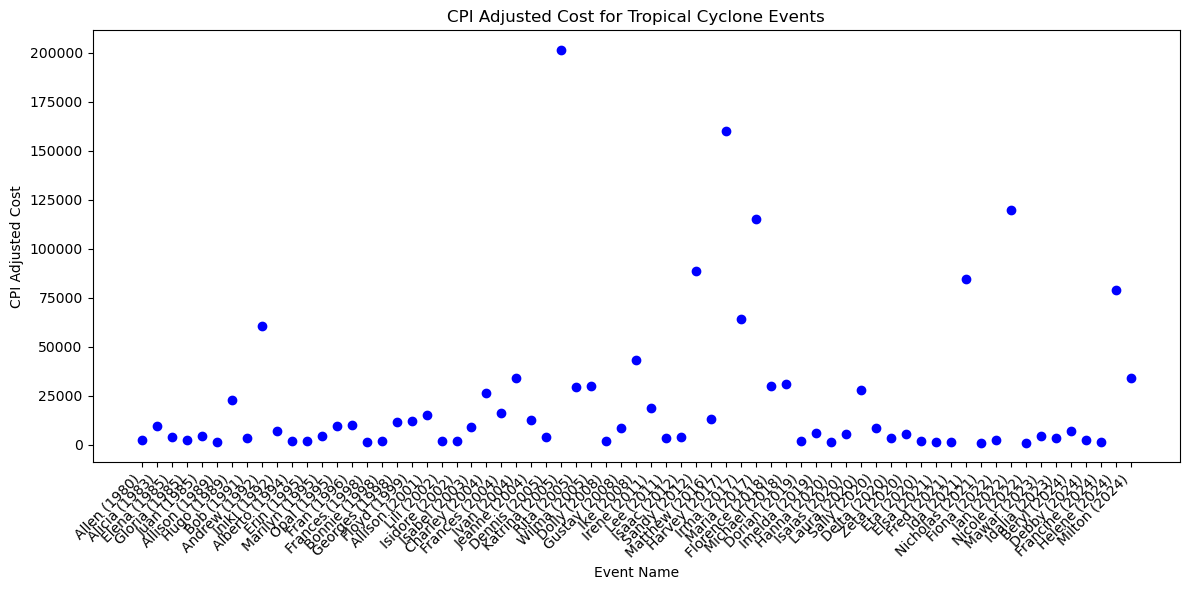

In [20]:
#scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(tropical_cyclone_df['Name'], cyclone_df['CPI-Adjusted Cost'], color='blue')
plt.title('CPI Adjusted Cost for Tropical Cyclone Events')
plt.xlabel('Event Name')
plt.ylabel('CPI Adjusted Cost')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [21]:
#Create a new column 'Year' with the year value from 'begin_date'
tropical_cyclone_df['Year'] = tropical_cyclone_df['begin_date'].dt.year

# Display the updated DataFrame
print(tropical_cyclone_df)

                Name          Disaster  Begin Date  End Date  \
1       Allen (1980)  Tropical Cyclone    19800807  19800811   
10     Alicia (1983)  Tropical Cyclone    19830817  19830820   
19      Elena (1985)  Tropical Cyclone    19850830  19850903   
20     Gloria (1985)  Tropical Cyclone    19850926  19850928   
21       Juan (1985)  Tropical Cyclone    19851027  19851031   
28    Allison (1989)  Tropical Cyclone    19890626  19890628   
29       Hugo (1989)  Tropical Cyclone    19890921  19890922   
38        Bob (1991)  Tropical Cyclone    19910818  19910820   
44     Andrew (1992)  Tropical Cyclone    19920823  19920827   
45      Iniki (1992)  Tropical Cyclone    19920911  19920912   
56    Alberto (1994)  Tropical Cyclone    19940707  19940710   
62       Erin (1995)  Tropical Cyclone    19950801  19950807   
63    Marilyn (1995)  Tropical Cyclone    19950915  19950917   
65       Opal (1995)  Tropical Cyclone    19951004  19951006   
69       Fran (1996)  Tropical Cyclone  

/var/folders/t9/4vfph_3j64n13cp0yftr6jxw0000gn/T/ipykernel_53281/3090135330.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tropical_cyclone_df['Year'] = tropical_cyclone_df['begin_date'].dt.year


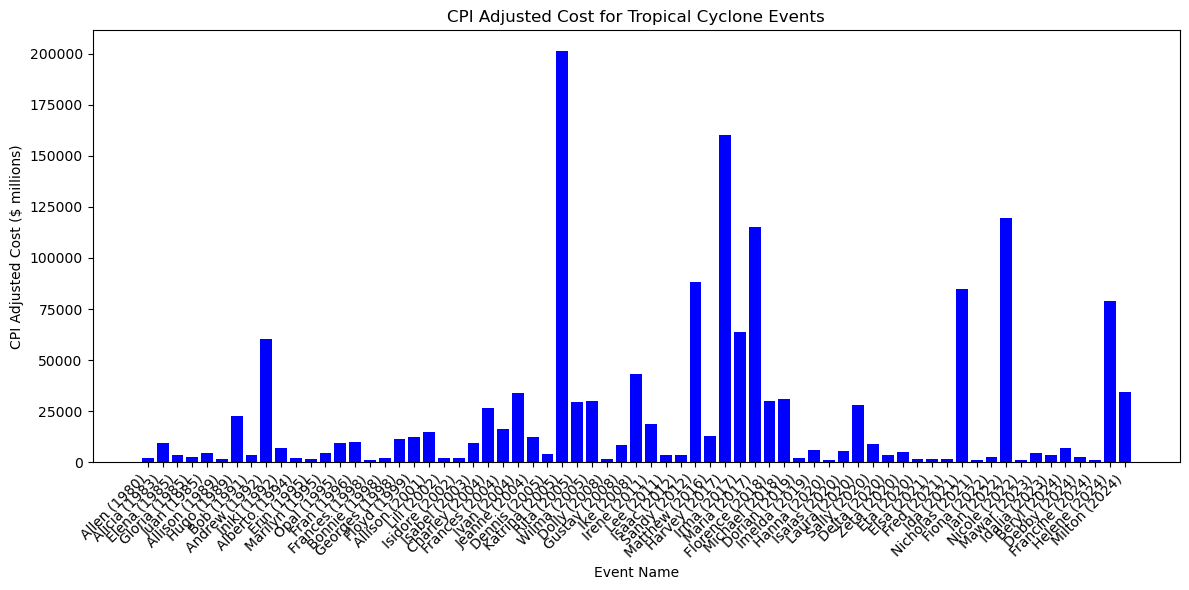

In [22]:
import matplotlib.pyplot as plt
# Bar plot
plt.figure(figsize=(12, 6))
plt.bar(tropical_cyclone_df['Name'], cyclone_df['CPI-Adjusted Cost'], color='blue')
plt.title('CPI Adjusted Cost for Tropical Cyclone Events')
plt.xlabel('Event Name')
plt.ylabel('CPI Adjusted Cost ($ millions)')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()

# Save the figure before showing it
plt.savefig('bar_plot.png')

# Show the plot
plt.show()

In [23]:
cyclone_df

Name          Disaster  Begin Date  End Date  \
1       Allen (1980)  Tropical Cyclone    19800807  19800811   
10     Alicia (1983)  Tropical Cyclone    19830817  19830820   
19      Elena (1985)  Tropical Cyclone    19850830  19850903   
20     Gloria (1985)  Tropical Cyclone    19850926  19850928   
21       Juan (1985)  Tropical Cyclone    19851027  19851031   
28    Allison (1989)  Tropical Cyclone    19890626  19890628   
29       Hugo (1989)  Tropical Cyclone    19890921  19890922   
38        Bob (1991)  Tropical Cyclone    19910818  19910820   
44     Andrew (1992)  Tropical Cyclone    19920823  19920827   
45      Iniki (1992)  Tropical Cyclone    19920911  19920912   
56    Alberto (1994)  Tropical Cyclone    19940707  19940710   
62       Erin (1995)  Tropical Cyclone    19950801  19950807   
63    Marilyn (1995)  Tropical Cyclone    19950915  19950917   
65       Opal (1995)  Tropical Cyclone    19951004  19951006   
69       Fran (1996)  Tropical Cyclone    19960905  19960908   
79    Frances (1998)  Tropical Cyclone    19980808  19980813   
80     Bonnie (1998)  Tropical Cyclone    19980827  19980829   
82    Georges (1998)  Tropical Cyclone    19980920  19980929   
89      Floyd (1999)  Tropical Cyclone    19990914  19990916   
97    Allison (2001)  Tropical Cyclone    20010605  20010617   
99       Lili (2002)  Tropical Cyclone    20020801  20020805   
100   Isidore (2002)  Tropical Cyclone    20020925  20020927   
108    Isabel (2003)  Tropical Cyclone    20030918  20030919   
113   Charley (2004)  Tropical Cyclone    20040813  20040814   
114   Frances (2004)  Tropical Cyclone    20040903  20040909   
115      Ivan (2004)  Tropical Cyclone    20040912  20040921   
116    Jeanne (2004)  Tropical Cyclone    20040915  20040929   
118    Dennis (2005)  Tropical Cyclone    20050709  20050711   
119   Katrina (2005)  Tropical Cyclone    20050825  20050830   
121      Rita (2005)  Tropical Cyclone    20050920  20050924   
122     Wilma (2005)  Tropical Cyclone    20051024  20051024   
143     Dolly (2008)  Tropical Cyclone    20080723  20080725   
144    Gustav (2008)  Tropical Cyclone    20080831  20080903   
145       Ike (2008)  Tropical Cyclone    20080912  20080914   
177     Irene (2011)  Tropical Cyclone    20110826  20110828   
179       Lee (2011)  Tropical Cyclone    20110901  20110905   
189     Isaac (2012)  Tropical Cyclone    20120826  20120831   
190     Sandy (2012)  Tropical Cyclone    20121030  20121031   
236   Matthew (2016)  Tropical Cyclone    20161008  20161012   
253    Harvey (2017)  Tropical Cyclone    20170825  20170831   
254      Irma (2017)  Tropical Cyclone    20170906  20170912   
255     Maria (2017)  Tropical Cyclone    20170919  20170921   
270  Florence (2018)  Tropical Cyclone    20180913  20180916   
271   Michael (2018)  Tropical Cyclone    20181010  20181011   
284    Dorian (2019)  Tropical Cyclone    20190828  20190906   
285    Imelda (2019)  Tropical Cyclone    20190917  20190921   
300     Hanna (2020)  Tropical Cyclone    20200725  20200726   
301    Isaias (2020)  Tropical Cyclone    20200803  20200804   
303     Laura (2020)  Tropical Cyclone    20200827  20200828   
304     Sally (2020)  Tropical Cyclone    20200915  20200917   
305     Delta (2020)  Tropical Cyclone    20201009  20201011   
306      Zeta (2020)  Tropical Cyclone    20201028  20201029   
307       Eta (2020)  Tropical Cyclone    20201108  20201112   
320      Elsa (2021)  Tropical Cyclone    20210707  20210709   
323      Fred (2021)  Tropical Cyclone    20210816  20210818   
324       Ida (2021)  Tropical Cyclone    20210829  20210901   
325  Nicholas (2021)  Tropical Cyclone    20210914  20210918   
342     Fiona (2022)  Tropical Cyclone    20220917  20220918   
343       Ian (2022)  Tropical Cyclone    20220928  20220930   
344    Nicole (2022)  Tropical Cyclone    20221110  20221111   
361     Mawar (2023)  Tropical Cyclone    20230524  20230525   
372    Idalia (2023)  Tropical Cyclone    202308

In [24]:
# Count the number of cyclones per year
cyclones_per_year = cyclone_df.groupby('Year').size().reset_index(name='Cyclone Count')

# Display the result
print(cyclones_per_year)

    Year  Cyclone Count
0   1980              1
1   1983              1
2   1985              3
3   1989              2
4   1991              1
5   1992              2
6   1994              1
7   1995              3
8   1996              1
9   1998              3
10  1999              1
11  2001              1
12  2002              2
13  2003              1
14  2004              4
15  2005              4
16  2008              3
17  2011              2
18  2012              2
19  2016              1
20  2017              3
21  2018              2
22  2019              2
23  2020              7
24  2021              4
25  2022              3
26  2023              2
27  2024              5


Interactive HTML file saved as hurricane_counts_per_year.html


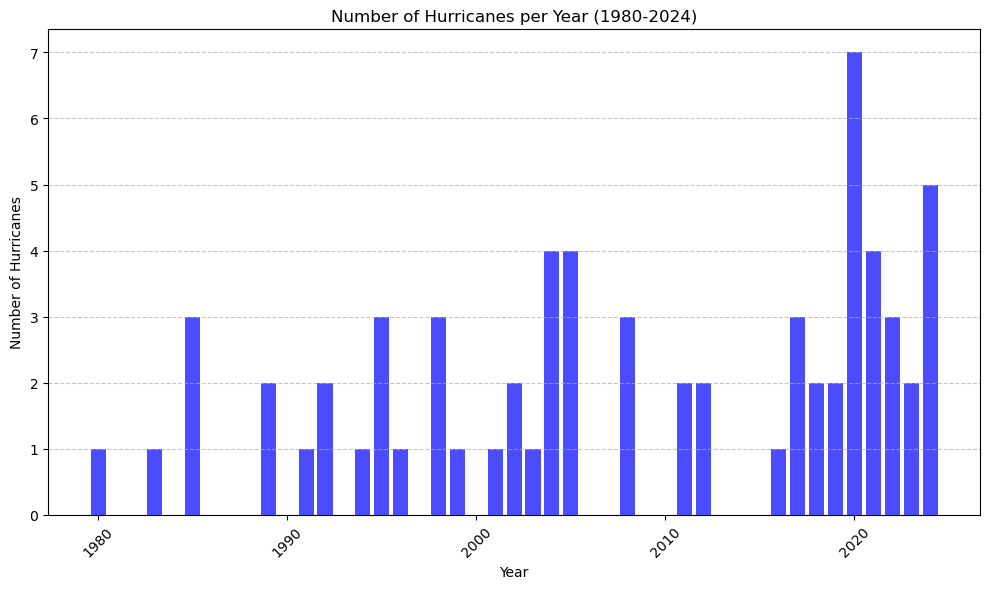

In [25]:
# Create a bar chart for the number of cyclones per year
plt.figure(figsize=(10, 6))
plt.bar(cyclones_per_year['Year'], cyclones_per_year['Cyclone Count'], color='b', alpha=0.7)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Number of Hurricanes')
plt.title('Number of Hurricanes per Year (1980-2024)')

# Show the plot
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('bar_plot_hurricane_counts.png')

# Convert the plot to HTML
html_content = mpld3.fig_to_html(plt.gcf())

# Save the HTML file, however it does not all interactive features like data hovering
html_filename = "hurricane_counts_per_year.html"
with open(html_filename, "w") as f:
    f.write(html_content)

print(f"Interactive HTML file saved as {html_filename}")

plt.show()

In [26]:
# make the bar chart using plotly express to show hurricane frequency from 1980-2024
fig = px.bar(
    cyclones_per_year,
    x="Year",
    y="Cyclone Count",
    hover_data=["Year", "Cyclone Count"],  
    title="Frequency of Hurricanes (>$1 Billion CPI-Adjusted Cost)",
    labels={"Year": "Year", "Cyclone Count": "Number of Hurricanes"},
)
# Add labels for the X and Y axes
fig.update_layout(
    xaxis_title="Year",
    yaxis_title="Number of Hurricanes",
    title={
        "text": "<b>Frequency of Hurricanes (>$1 Billion CPI-Adjusted Cost, 1980-2024)</b>",
        "x": 0.5,  #title in bold and centered
    },
    xaxis=dict(tickangle=45)
)

# Save the HTML file
html_filename = "px_hurricane_counts_per_year.html"
fig.write_html(html_filename)

print(f"Interactive HTML file saved as {html_filename}")

fig.show()


Interactive HTML file saved as px_hurricane_counts_per_year.html


In [27]:
#to make the plot interactive using plotly and add linear regression.


X = cyclones_per_year['Year'].values.reshape(-1, 1)  # Reshape for sklearn for later modeling use 
y = cyclones_per_year['Cyclone Count'].values

# Perform linear regression
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)


fig = px.bar(
    cyclones_per_year,
    x="Year",
    y="Cyclone Count",
    hover_data=["Year", "Cyclone Count"],  
    title="Frequency of Hurricanes (>$1 Billion CPI-Adjusted Cost, 1980-2024)",
    labels={"Year": "Year", "Cyclone Count": "Number of Hurricanes"},
)

# Plot the regression line
fig.add_trace(
    go.Scatter(
        x=cyclones_per_year["Year"],
        y=y_pred,
        mode="lines",
        name="Regression Line",
        line=dict(color="red", width=2)
    )
)

# Add labels for the X and Y axes
fig.update_layout(
    xaxis_title="Year",
    yaxis_title="Number of Hurricanes",
    title={
        "text": "<b>Frequency of Hurricanes (>$1 Billion CPI-Adjusted Cost)</b>",
        "x": 0.5,  #title in bold and centered
    },
    xaxis=dict(tickangle=-45)
)

# Save the HTML file
html_filename = "pxreg_hurricane_counts_per_year.html"
fig.write_html(html_filename)

fig.show()
print(f"Interactive HTML file saved as {html_filename}")

# Print the slope and intercept of the regression line
print(f"Slope: {model.coef_[0]:.2f}")
print(f"Intercept: {model.intercept_:.2f}")



Interactive HTML file saved as pxreg_hurricane_counts_per_year.html
Slope: 0.05
Intercept: -101.09


### slope of 0.05 in linear regression shows the rate of change in numbers of cyclone with Year. cyclone counts is expected to increase by 0.05 every year. So, over the period of 20 years it would be an increase of 1.0.
slope does indicate small increase in hurricane frequency (>$1 billion cost), however, there are fluctuations in data as some years.
In linear regression, the intercept is the point at which the regression line crosses the y-axis. However in our case, it is just a mathematical line as we can't measure cyclone in year 0.


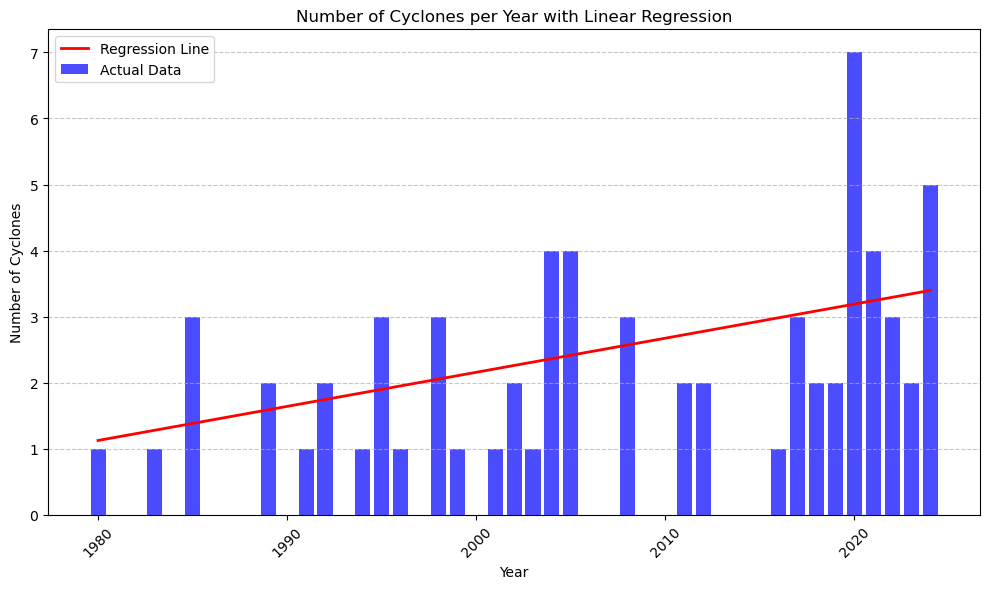

Slope: 0.05
Intercept: -101.09


In [28]:
# this is not the interactive plot (made by matplotlib)


X = cyclones_per_year['Year'].values.reshape(-1, 1)
y = cyclones_per_year['Cyclone Count'].values

# Perform linear regression
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# Plot the bar chart with the regression line
plt.figure(figsize=(10, 6))
plt.bar(cyclones_per_year['Year'], cyclones_per_year['Cyclone Count'], color='b', alpha=0.7, label='Actual Data')

# Plot the regression line
plt.plot(cyclones_per_year['Year'], y_pred, color='r', linewidth=2, label='Regression Line')

# Add labels, title, and legend
plt.xlabel('Year')
plt.ylabel('Number of Cyclones')
plt.title('Number of Cyclones per Year with Linear Regression')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print the slope and intercept of the regression line
print(f"Slope: {model.coef_[0]:.2f}")
print(f"Intercept: {model.intercept_:.2f}")


/var/folders/t9/4vfph_3j64n13cp0yftr6jxw0000gn/T/ipykernel_53281/1686016298.py:9: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



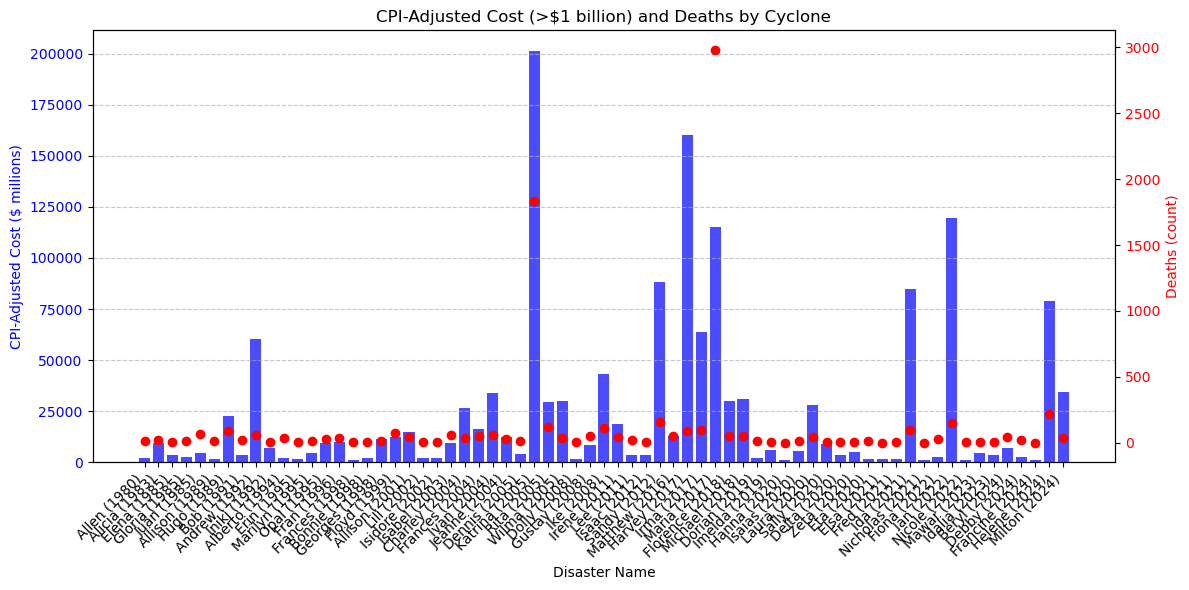

In [29]:
# Create a plot with dual y-axes using matplotlib
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar chart for CPI-Adjusted Cost
ax1.bar(cyclone_df['Name'], cyclone_df['CPI-Adjusted Cost'], color='blue', alpha=0.7, label='CPI-Adjusted Cost ($)')
ax1.set_xlabel('Disaster Name')
ax1.set_ylabel('CPI-Adjusted Cost ($ millions)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_xticklabels(cyclone_df['Name'], rotation=45, ha='right')
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Create a second y-axis for Deaths
ax2 = ax1.twinx()
ax2.scatter(cyclone_df['Name'], cyclone_df['Deaths'], color='red', label='Deaths', zorder=5)
ax2.set_ylabel('Deaths (count)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Add a title and legend
plt.title('CPI-Adjusted Cost (>$1 billion) and Deaths by Cyclone')
fig.tight_layout()

# Show the plot
plt.show()


/var/folders/t9/4vfph_3j64n13cp0yftr6jxw0000gn/T/ipykernel_53281/229957513.py:12: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



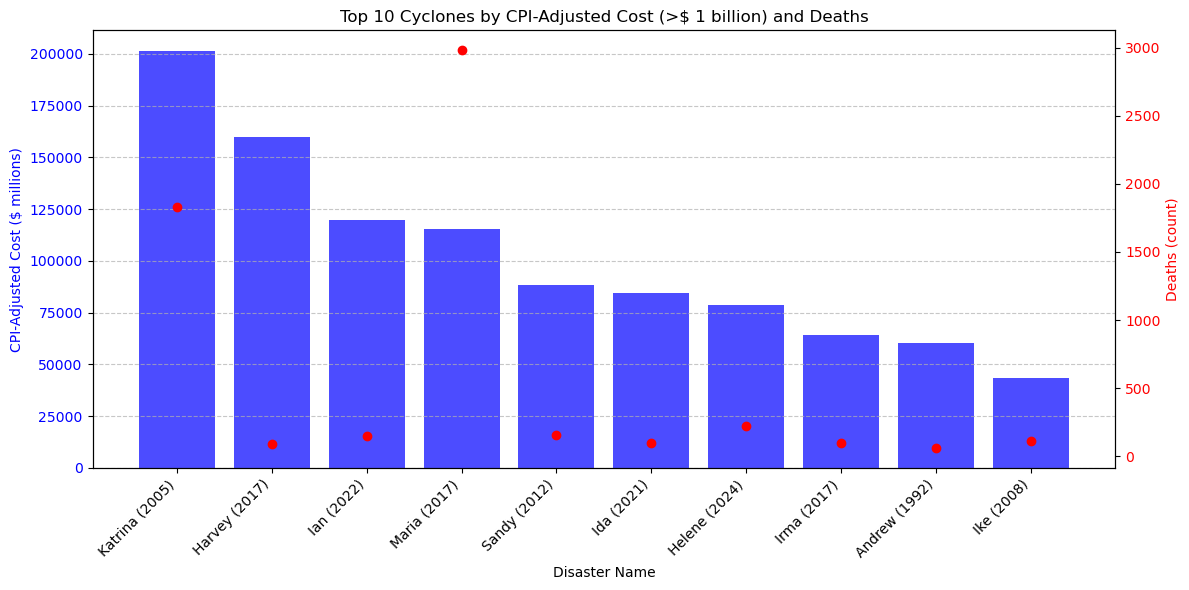

In [30]:
# Sort the data by CPI-Adjusted Cost and select the top 10
top_cyclones = cyclone_df.sort_values(by='CPI-Adjusted Cost', ascending=False).head(10)

#  plot with dual y-axes
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar chart for CPI-Adjusted Cost
ax1.bar(top_cyclones['Name'], top_cyclones['CPI-Adjusted Cost'], color='blue', alpha=0.7, label='CPI-Adjusted Cost ($)')
ax1.set_xlabel('Disaster Name')
ax1.set_ylabel('CPI-Adjusted Cost ($ millions)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_xticklabels(top_cyclones['Name'], rotation=45, ha='right')
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# second y-axis for Deaths
ax2 = ax1.twinx()
ax2.scatter(top_cyclones['Name'], top_cyclones['Deaths'], color='red', label='Deaths', zorder=5)
ax2.set_ylabel('Deaths (count)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Adding title and legend
plt.title('Top 10 Cyclones by CPI-Adjusted Cost (>$ 1 billion) and Deaths')
fig.tight_layout()

# Show the plot
plt.show()


/var/folders/t9/4vfph_3j64n13cp0yftr6jxw0000gn/T/ipykernel_53281/2777887331.py:12: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



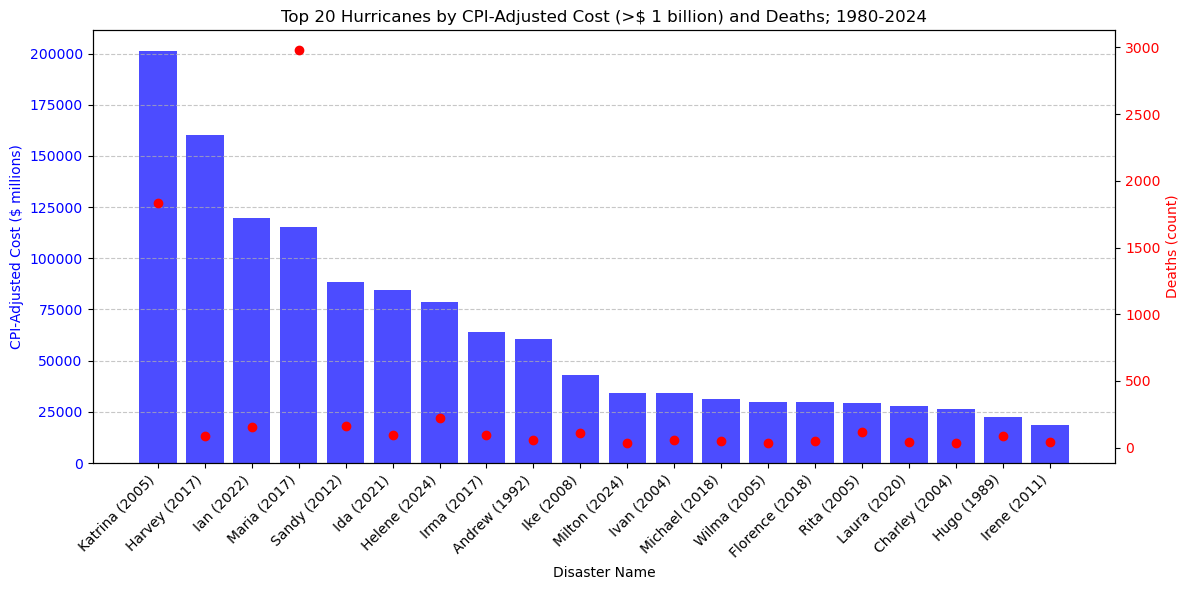

In [31]:
# Sort the data by CPI-Adjusted Cost and select the top 20
top_cyclones = cyclone_df.sort_values(by='CPI-Adjusted Cost', ascending=False).head(20)

# plot with dual y-axes
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar chart for CPI-Adjusted Cost
ax1.bar(top_cyclones['Name'], top_cyclones['CPI-Adjusted Cost'], color='blue', alpha=0.7, label='CPI-Adjusted Cost ($)')
ax1.set_xlabel('Disaster Name')
ax1.set_ylabel('CPI-Adjusted Cost ($ millions)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_xticklabels(top_cyclones['Name'], rotation=45, ha='right')
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# second y-axis for Deaths
ax2 = ax1.twinx()
ax2.scatter(top_cyclones['Name'], top_cyclones['Deaths'], color='red', label='Deaths', zorder=5)
ax2.set_ylabel('Deaths (count)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Adding title and legend
plt.title('Top 20 Hurricanes by CPI-Adjusted Cost (>$ 1 billion) and Deaths; 1980-2024')
fig.tight_layout()
plt.savefig('top20_bar_plot_deaths.png')

# Show the plot
plt.show()

In [32]:
# To make interactive plots using plotly express

# Sort the data by CPI-Adjusted Cost and select the top 20
top_cyclones = cyclone_df.sort_values(by='CPI-Adjusted Cost', ascending=False).head(20)

# Create a Plotly figure with two y-axes
fig = go.Figure()

# Add bars for CPI-Adjusted Cost
fig.add_trace(go.Bar(
    x=top_cyclones['Name'],
    y=top_cyclones['CPI-Adjusted Cost'],
    name='CPI-Adjusted Cost ($ millions)',
    marker_color='blue',
    opacity=0.7
))

# Add scatter plot trace for Deaths
fig.add_trace(go.Scatter(
    x=top_cyclones['Name'],
    y=top_cyclones['Deaths'],
    name='Deaths (count)',
    mode='markers+lines',
    line=dict(dash='dot', color='red'),
    marker=dict(size=10),
    yaxis='y2'
))

# Update layout
fig.update_layout(
    title={
        "text": "<b>Top 20 Hurricanes by CPI-Adjusted Cost (>$ 1 billion) and Deaths; 1980-2024)</b>",
        "x": 0.5,  #title in bold and centered
    },
    xaxis=dict(title='Disaster Name', tickangle=-45),
    yaxis=dict(title='CPI-Adjusted Cost ($ millions)', titlefont=dict(color='blue'), tickfont=dict(color='blue')),
    yaxis2=dict(title='Deaths (count)', titlefont=dict(color='red'), tickfont=dict(color='red'), overlaying='y', side='right'),
    legend=dict(x=0.7, y=0.9),
    barmode='group',
    template='plotly_white'
)

# Save the HTML file
html_filename = "top20_cost_death_plotly.html"
fig.write_html(html_filename)

fig.show()
print(f"Interactive HTML file saved as {html_filename}")


Interactive HTML file saved as top20_cost_death_plotly.html


In [33]:
cyclone_df.head()

Name          Disaster  Begin Date  End Date  CPI-Adjusted Cost  \
1    Allen (1980)  Tropical Cyclone    19800807  19800811             2236.2   
10  Alicia (1983)  Tropical Cyclone    19830817  19830820             9450.0   
19   Elena (1985)  Tropical Cyclone    19850830  19850903             3788.4   
20  Gloria (1985)  Tropical Cyclone    19850926  19850928             2491.3   
21    Juan (1985)  Tropical Cyclone    19851027  19851031             4340.4   

    Unadjusted Cost  Deaths begin_date   end_date  Year  
1             590.0      13 1980-08-07 1980-08-11  1980  
10           3000.0      21 1983-08-17 1983-08-20  1983  
19           1297.4       4 1985-08-30 1985-09-03  1985  
20            856.1      11 1985-09-26 1985-09-28  1985  
21           1496.7      63 1985-10-27 1985-10-31  1985

In [34]:
# Get the target variables. 
target = cyclone_df["Name"]
target_names = ["CPI-Adjusted Cost", "Deaths"]

In [35]:
# Get the features. 
data = cyclone_df.drop("Name", axis=1)
data = cyclone_df.drop("Disaster", axis=1)
feature_names = data.columns

data.head()

Name  Begin Date  End Date  CPI-Adjusted Cost  Unadjusted Cost  \
1    Allen (1980)    19800807  19800811             2236.2            590.0   
10  Alicia (1983)    19830817  19830820             9450.0           3000.0   
19   Elena (1985)    19850830  19850903             3788.4           1297.4   
20  Gloria (1985)    19850926  19850928             2491.3            856.1   
21    Juan (1985)    19851027  19851031             4340.4           1496.7   

    Deaths begin_date   end_date  Year  
1       13 1980-08-07 1980-08-11  1980  
10      21 1983-08-17 1983-08-20  1983  
19       4 1985-08-30 1985-09-03  1985  
20      11 1985-09-26 1985-09-28  1985  
21      63 1985-10-27 1985-10-31  1985

In [36]:
# Split data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)